#Lecture 7- Spring 2024
#Villas-Boas

#Lecture 7 EEO 118 Spring 2024



In [1]:
# Load the 'pacman' package
library(pacman) 
#packages to use load them now using the pacman "manager"
p_load(dplyr, readr) 
#Another great feature of p_load(): if you try to load a package that is not installed on your machine, p_load() install the package for you, rather than throwing an error. For instance, let’s install and load one final package named ggplot2. 
p_load(ggplot2)



#set scientific display off, thank you Roy
options(scipen=999)


pacman::p_load(lfe, lmtest, haven, sandwich, tidyverse)
# lfe for running fixed effects regression
# lmtest for displaying robust SE in output table
# haven for loading in dta files
# sandwich for producing robust Var-Cov matrix
# tidyverse for manipulating data and producing plots

Installing package into ‘/srv/r’
(as ‘lib’ is unspecified)


lfe installed



In [2]:
library(haven)
library(ggplot2)

In [3]:
#-------------------------------------------
#1. Read in data
#-------------------------------------------
my_data <- read_dta("dataLecture7.dta")
head(my_data)

state,county,fips,trump16,clinton16,otherpres16,romney12,obama12,otherpres12,demsen16,⋯,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc,bh_pct
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Alabama,Autauga,1001,18172,5936,865,17379,6363,190,6331,⋯,13.97845556,53099,5.591657,12.41704602,75.40722865,10.00211164,74.06560146,42.00216232,2,20.94316
Alabama,Baldwin,1003,72883,18458,3874,66016,18424,898,19145,⋯,18.71485139,51365,6.286843,9.972417933,70.45288897,7.842226994,68.40560728,42.27909911,3,13.59230
Alabama,Barbour,1005,5454,4871,144,5550,5912,47,4777,⋯,16.52889457,33956,12.824738,26.23592756,87.13221298,19.57975167,81.36474583,67.7896347,6,52.19809
Alabama,Bibb,1007,6738,1874,207,6132,2202,86,2082,⋯,14.8856991,39776,7.146827,19.3015873,88,15.02049009,87.47177386,68.35260746,1,23.43612
Alabama,Blount,1009,22859,2156,573,20757,2970,279,2980,⋯,17.19291557,46212,5.953833,19.96858533,86.95024321,16.64336837,86.16360993,89.95150204,1,10.28525
Alabama,Bullock,1011,1140,3530,40,1251,4061,10,3364,⋯,15.13457165,29335,13.258520,33.43788354,89.74498841,11.7803838,79.15778252,51.37438153,6,75.62547


In [4]:
#generate variables Y and x1
my_data$Y<-my_data$trump16/my_data$clinton16
my_data$x1<-my_data$romney12/my_data$obama12

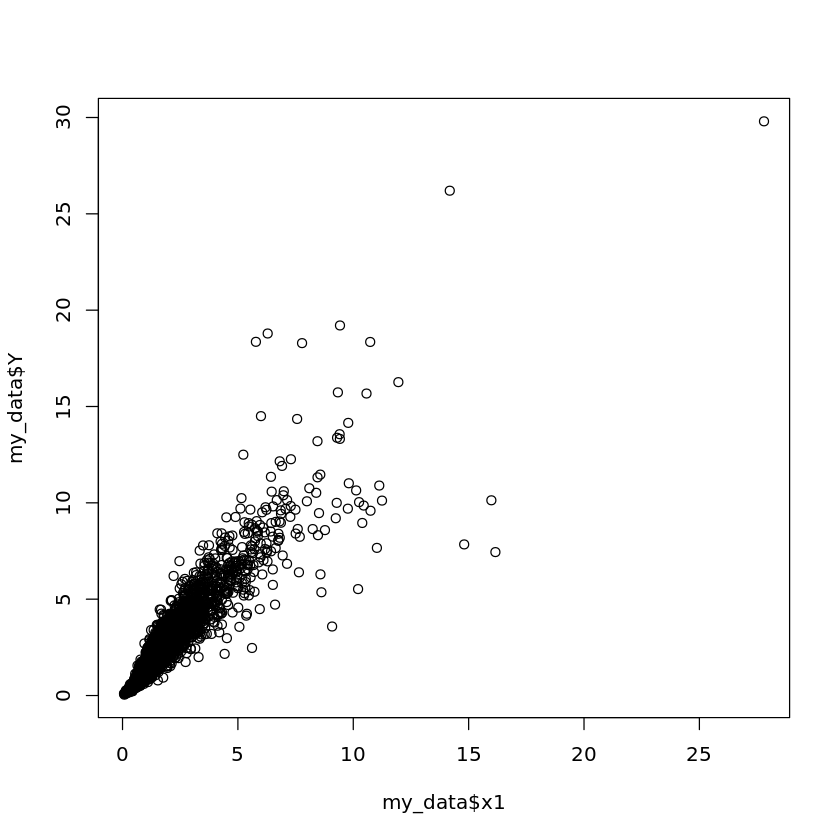

In [5]:
slide12<-plot(my_data$x1,my_data$Y) 

In [6]:
#use non missing values only from now on
my_data2<-my_data[complete.cases(my_data),]
my_data3 <- my_data2[my_data2$Y !=Inf,] 
#my_data3 <-my_data2[my_data2$white_pct!=NA]

In [8]:
summary(my_data3)

    state              county               fips          trump16      
 Length:3110        Length:3110        Min.   : 1001   Min.   :    58  
 Class :character   Class :character   1st Qu.:19038   1st Qu.:  3233  
 Mode  :character   Mode  :character   Median :29206   Median :  7246  
                                       Mean   :30647   Mean   : 20190  
                                       3rd Qu.:46004   3rd Qu.: 17886  
                                       Max.   :56045   Max.   :769743  
   clinton16        otherpres16        romney12         obama12       
 Min.   :      4   Min.   :     3   Min.   :    54   Min.   :      5  
 1st Qu.:   1170   1st Qu.:   184   1st Qu.:  2919   1st Qu.:   1557  
 Median :   3180   Median :   499   Median :  6450   Median :   4002  
 Mean   :  21101   Mean   :  2460   Mean   : 19449   Mean   :  21054  
 3rd Qu.:   9828   3rd Qu.:  1674   3rd Qu.: 16315   3rd Qu.:  11348  
 Max.   :2464364   Max.   :200201   Max.   :885333   Max.   :2216903  

In [9]:

#regression full model
regfull<-lm(Y ~ x1 + white_pct, my_data3)
summary(regfull)


Call:
lm(formula = Y ~ x1 + white_pct, data = my_data3)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.2196  -0.3804  -0.0582   0.3043  10.7917 

Coefficients:
              Estimate Std. Error t value            Pr(>|t|)    
(Intercept) -0.9098130  0.0649996  -14.00 <0.0000000000000002 ***
x1           1.1775786  0.0099875  117.91 <0.0000000000000002 ***
white_pct    0.0172590  0.0008362   20.64 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8936 on 3107 degrees of freedom
Multiple R-squared:  0.8411,	Adjusted R-squared:  0.841 
F-statistic:  8222 on 2 and 3107 DF,  p-value: < 0.00000000000000022


In [10]:
#regression no percent white as control
regsmall<-lm(Y ~ x1, my_data3)
summary(regsmall)


Call:
lm(formula = Y ~ x1, data = my_data3)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.7083  -0.4276  -0.1510   0.3693  10.9405 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept)  0.32360    0.02726   11.87 <0.0000000000000002 ***
x1           1.22707    0.01034  118.71 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9527 on 3108 degrees of freedom
Multiple R-squared:  0.8193,	Adjusted R-squared:  0.8192 
F-statistic: 1.409e+04 on 1 and 3108 DF,  p-value: < 0.00000000000000022


In [11]:
#collinearity Slides

#Baseline Model 
regBase <- lm(Y~x1+female_pct+white_pct, my_data3)
summary(regBase)


Call:
lm(formula = Y ~ x1 + female_pct + white_pct, data = my_data3)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.1435  -0.3643  -0.0619   0.3012  10.9558 

Coefficients:
              Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  0.9916309  0.3498073   2.835              0.00462 ** 
x1           1.1709031  0.0100133 116.935 < 0.0000000000000002 ***
female_pct  -0.0380988  0.0068881  -5.531         0.0000000345 ***
white_pct    0.0174700  0.0008332  20.969 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8894 on 3106 degrees of freedom
Multiple R-squared:  0.8426,	Adjusted R-squared:  0.8425 
F-statistic:  5544 on 3 and 3106 DF,  p-value: < 0.00000000000000022


In [12]:
#Alternative Model – Perfect collinearity
my_data3$male_pct=1-my_data3$female_pct
regPC <- lm(Y~x1+female_pct+male_pct+white_pct, my_data3)
summary(regPC)

#note in the regression output below,  that male_pct coefficient is not estimated because male_pct is 1-female_pct, they are perfectly collinear
#with each other, 
#the line male_pct has NA   NA
#Non available NA


Call:
lm(formula = Y ~ x1 + female_pct + male_pct + white_pct, data = my_data3)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.1435  -0.3643  -0.0619   0.3012  10.9558 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  0.9916309  0.3498073   2.835              0.00462 ** 
x1           1.1709031  0.0100133 116.935 < 0.0000000000000002 ***
female_pct  -0.0380988  0.0068881  -5.531         0.0000000345 ***
male_pct            NA         NA      NA                   NA    
white_pct    0.0174700  0.0008332  20.969 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8894 on 3106 degrees of freedom
Multiple R-squared:  0.8426,	Adjusted R-squared:  0.8425 
F-statistic:  5544 on 3 and 3106 DF,  p-value: < 0.00000000000000022


In [ ]:
#Alternative Model – Multi collinearity
regMC <- lm(Y~x1+female_pct+white_pct+bh_pct, my_data3)
#where corr(white_pct,bh_pct)=-0.92
summary(regMC)

In [ ]:
#for graph in slide 28
#get the predicted Y hats
my_data3$Yhat<-regBase$fitted.values

#put Y and Y hat on same graph and x1 on horizontal axis
#make combined scatter plot of Y data and fitted values of Y (Yhat)
#given regression estimates usinf X1, white_pct and female_pct
scatter_data_fittedVals <- ggplot(data = my_data3) + geom_point(aes(x=x1, y=Y, color = "data")) +
  geom_point(aes(x=x1, y=Yhat, color = "fitted")) + 
  xlab("x1=Ratio Rodney to Obama Votes in 2012") + ylab("Y=Ratio Trump to Clinton Votes in 2016 ") +
  ggtitle("Y (Red) and Predicted Y (Blue) and x1")
scatter_data_fittedVals